In [2]:
% matplotlib inline

import numpy as np
import matplotlib as mpl
import matplotlib.pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.io import loadmat 

fd = loadmat('gradient_data/brainmap/FunctionalDecoding.mat')
SpecificTasks = loadmat('gradient_data/brainmap/SpecificTasks.mat')
AllBD = SpecificTasks['AllBD']
AllPC = SpecificTasks['AllPC']

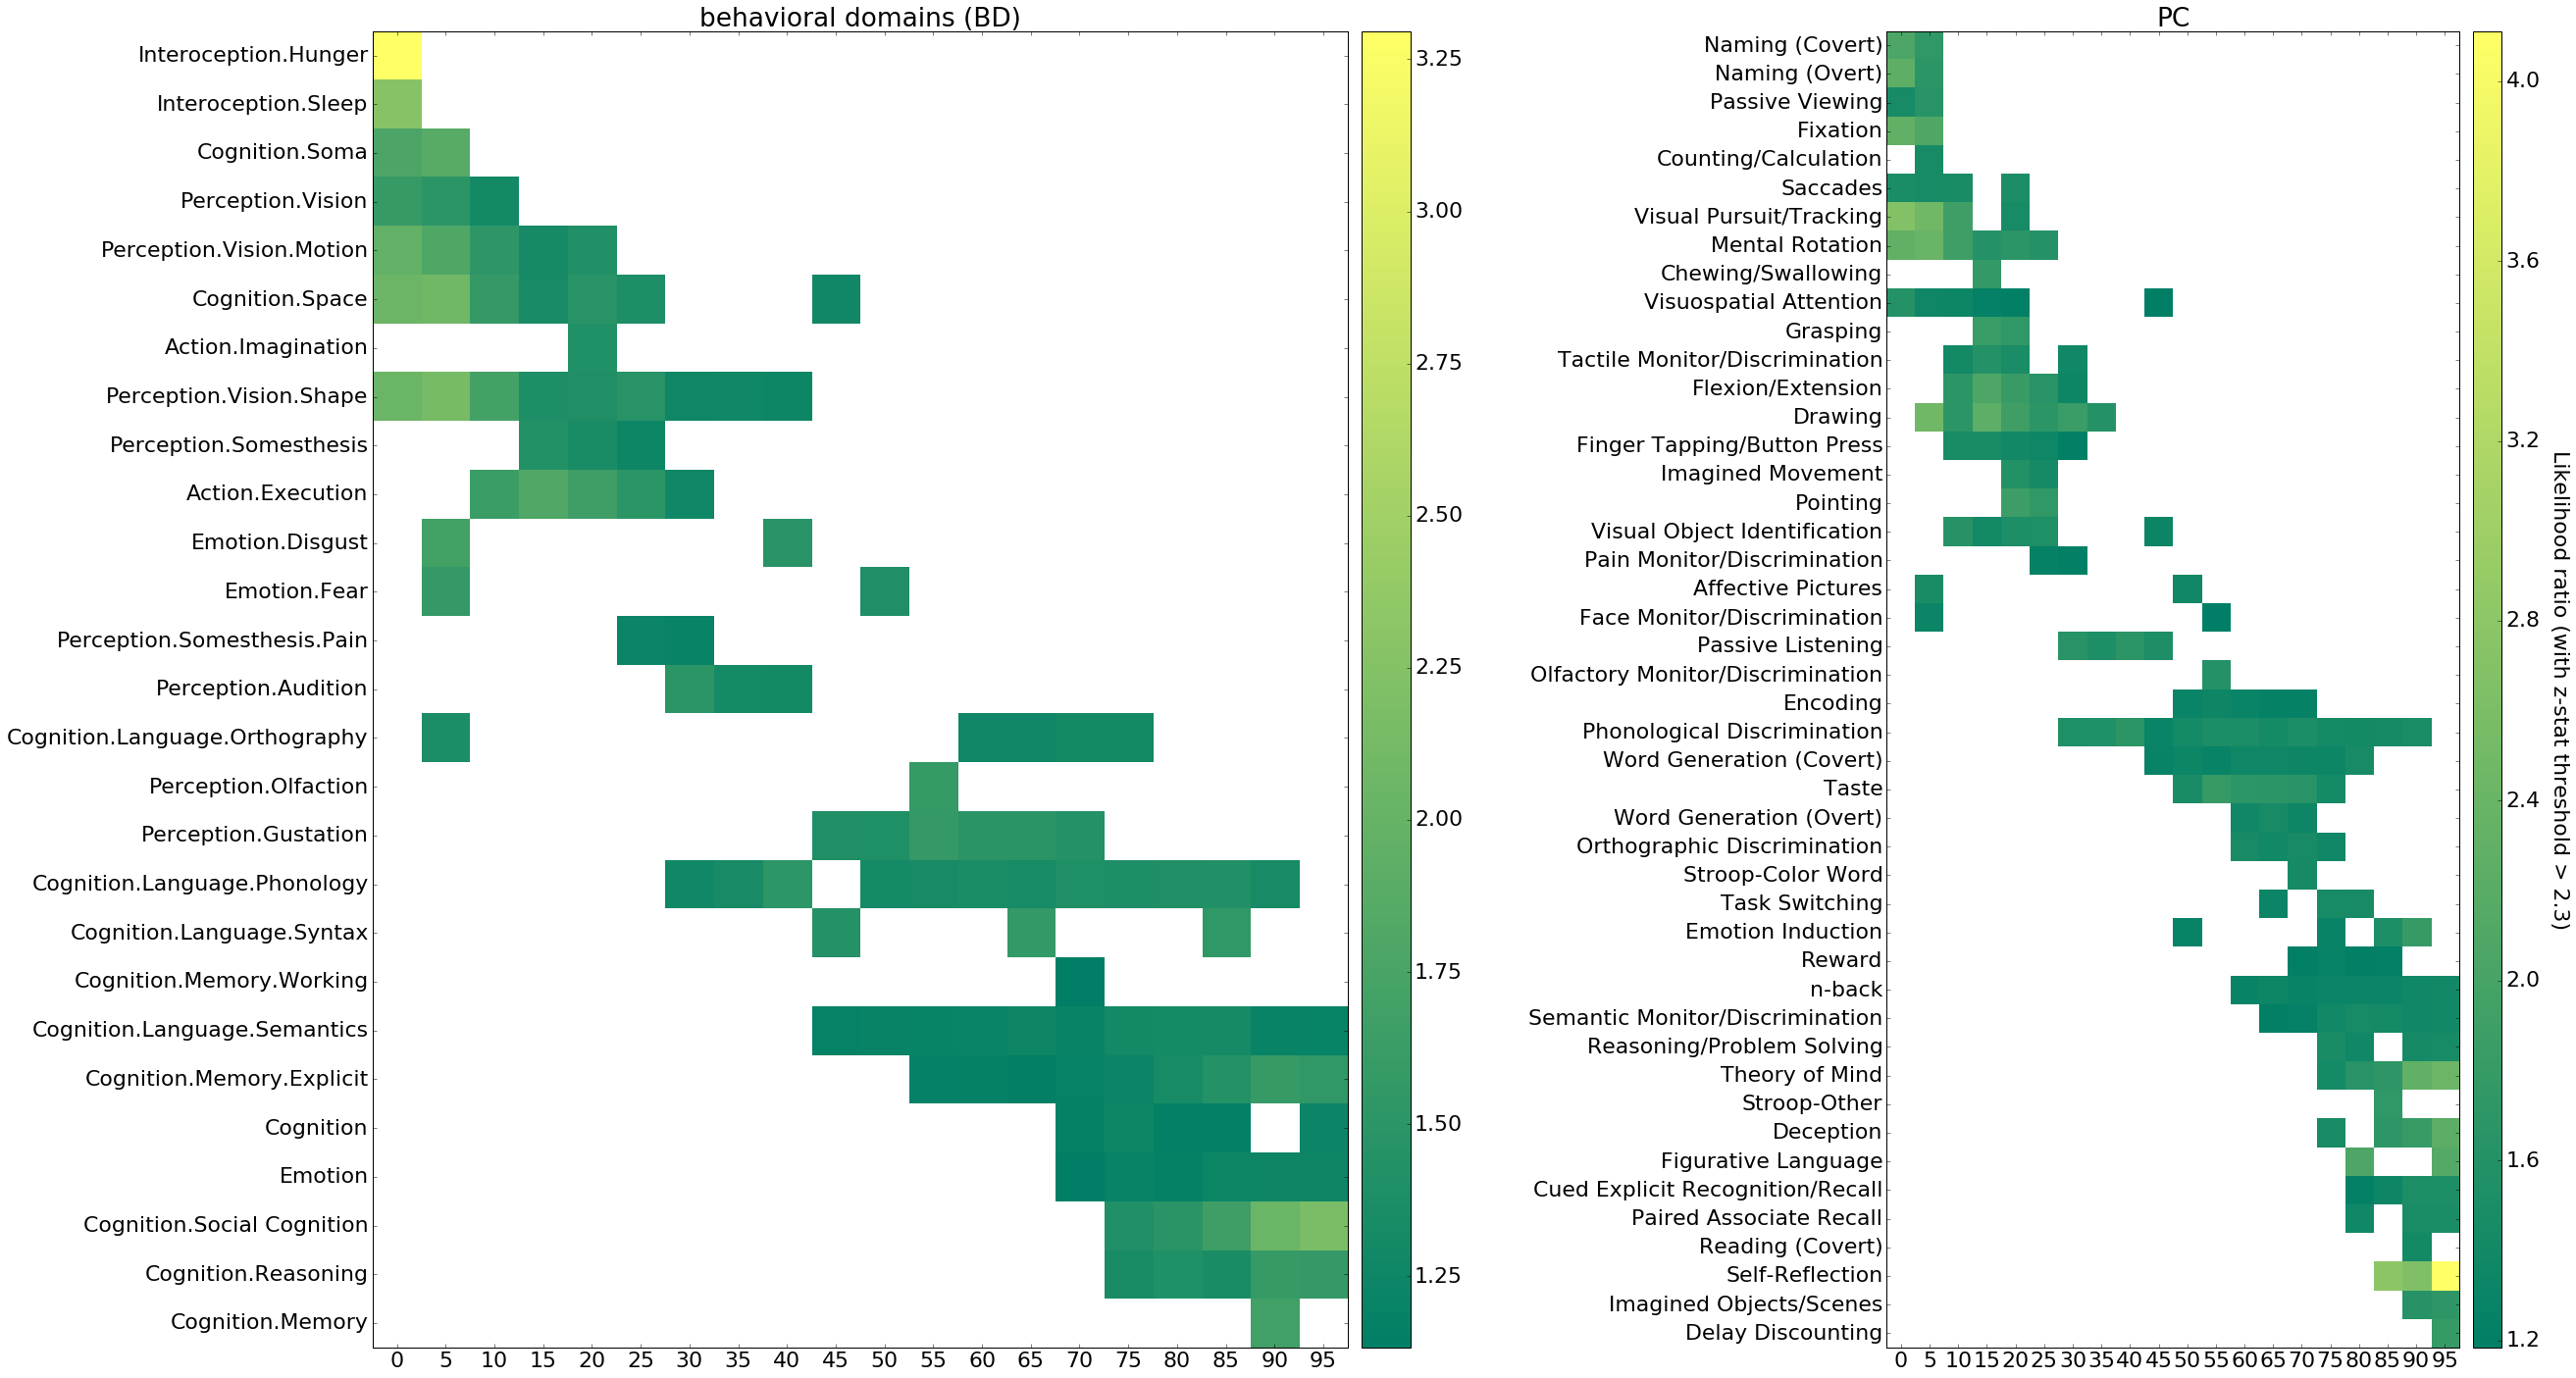

In [3]:
thr = 2.3; # Z threshold
min_study_num = 24

h, (ax1, ax2) = plt.subplots(1,2,figsize=(40,20))

# Behavioral Domains:
bd = np.array([fd['BDprofile_LR'] * [fd['BDprofile_Z'] > thr]]*1).squeeze();
notzero = np.intersect1d(np.where([np.sum(bd,axis=0) > 0])[1], 
                         np.where([np.array(AllBD['Available']).squeeze().T > min_study_num])[1])
bd = bd[:,notzero].T

i,j = np.where(bd)
m = np.zeros(len(bd))
for k in range(len(bd)):
    m[k] = np.mean(j[i == k])
ind = np.argsort(m)

data = np.ma.masked_where(0.1 > bd[ind,:], bd[ind,:])
cax1 = ax1.imshow(data, interpolation="nearest", cmap='summer')
tmp = [str(i) for i in fd['BDnames'][0]]
BDnames = [i.replace("[u'", "") for i in tmp]
BDnames = [i.replace("']", "") for i in BDnames]
ax1.set_yticks(range(len(ind)))
ax1.set_yticklabels(np.array(BDnames)[notzero[ind]])
ax1.set_xticks(range(20))
ax1.set_xticklabels(range(0,100,5))
ax1.set_title('behavioral domains (BD)')

divider1 = make_axes_locatable(ax1)
c1 = divider1.append_axes("right", size="5%", pad=0.2)
cbar1 = h.colorbar(cax1, cax=c1)

# PC
pc = np.array([fd['PCprofile_LR'] * [fd['PCprofile_Z'] > thr]]*1).squeeze();
notzero = np.intersect1d(np.where([np.sum(pc,axis=0) > 0])[1], 
                         np.where([np.array(AllPC['Available']).squeeze().T > min_study_num])[1])
pc = pc[:,notzero].T

i,j = np.where(pc)
m = np.zeros(len(pc))
for k in range(len(pc)):
    m[k] = np.mean(j[i == k])
ind = np.argsort(m)

data = np.ma.masked_where(0.1 > pc[ind,:], pc[ind,:])
cax2 = ax2.imshow(data, interpolation="nearest", cmap='summer')
tmp = [str(i) for i in fd['PCnames'][0]]
PCnames = [i.replace("[u'", "") for i in tmp]
PCnames = [i.replace("']", "") for i in PCnames]
ax2.set_yticks(range(len(ind)))
ax2.set_yticklabels(np.array(PCnames)[notzero[ind]])
ax2.set_xticks(range(20))
ax2.set_xticklabels(range(0,100,5))
ax2.set_title('PC')

divider2 = make_axes_locatable(ax2)
c2 = divider2.append_axes("right", size="5%", pad=0.2)
cbar2 = h.colorbar(cax2, cax=c2)
cbar2.ax.set_ylabel('Likelihood ratio (with z-stat threshold > %s)' % str(thr), rotation=270, labelpad=30)

mpl.rcParams.update({'font.size': 22})
h.tight_layout()
h.savefig('gradient_data/figures/fig.brainmap.pdf')
plt.show()